Importing Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CW\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Loading Dataset

In [4]:
news_dataset = pd.read_csv('train.csv')

Data Pre-Processing

In [5]:
news_dataset.shape

(20800, 5)

In [6]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [9]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
4539    4539  Salah Abdeslam, Suspect in Paris Attacks, Is E...   
11357  11357  Republican Convention, Hillary Clinton, Roger ...   
20132  20132  PINKERTON: The Fate of Obamacare in the Trump ...   
18077  18077  The Long, Lonely Fall of a Heisman Trophy Winn...   
10805  10805  Fueled by Small Donations, Donald Trump Makes ...   
...      ...                                                ...   
17861  17861  Muslim Americans Speak of Escalating Worries -...   
13386  13386  Hillary Reveals Her Pick for Secretary of Stat...   
6601    6601  Entire German 2016 Budget Surplus Earmarked Fo...   
2654    2654  Comment on Seattle council member proposes a M...   
10515  10515  See Dems accept foreign cash to disrupt Trump ...   

                                        author  \
4539                          Aurelien Breeden   
11357    Andrea Kannapell and Sandra Stevenson   
20132                       James P. Pinkerto

In [10]:
port_stem = PorterStemmer()

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [11]:
news_dataset['text'] = news_dataset['text'].apply(stemming)
print(news_dataset['text'])

4539     pari salah abdeslam thought direct particip no...
11357    want get brief email good even latest second d...
20132    first instal seri explor past fight obamacar c...
18077    boulder colo dark rashaan salaam drove suzuki ...
10805    donald j trump eras enorm disadvantag hillari ...
                               ...                        
17861    muslim american alreadi alarm elect donald j t...
13386    comment hillari clinton reportedli eye joe bid...
6601     german govern alloc entir six billion euro bud...
2654     post novemb dcg comment seattl proggi love pus...
10515    see dem accept foreign cash disrupt trump rall...
Name: text, Length: 500, dtype: object


In [12]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values
print(X)
print(Y)

['pari salah abdeslam thought direct particip novemb pari attack surviv hand franc belgium wednesday prosecutor countri said later charg french court murder connect terror particip terrorist conspiraci possess weapon explos pari prosecutor offic announc mr abdeslam also believ connect attack brussel last month subject european arrest warrant simplifi extradit two european union countri within framework pari attack th novemb salah abdeslam surrend french author morn belgian feder prosecutor offic said statement pari prosecutor offic said mr abdeslam arriv french territori frank berton mr abdeslam french lawyer said brought franc heavi escort helicopt prison detain beveren belgium french justic minist urvoa said cabinet meet mr abdeslam would held isol prison pari region mr abdeslam believ part team islam state oper carri seri shoot suicid bomb pari northern suburb st even nov kill peopl wound french citizen moroccan ancestri live belgium mr abdeslam fled pari brussel earli hour nov targ

Feature Engineering (Vectorizing)

In [13]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

Splitting the dataset to training & test data

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


WITH PACKAGE IMPLEMENTATION

In [15]:
logistic_model = LogisticRegression()

In [16]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

EVALUATION
1) Accuracy Score

In [17]:
# accuracy score on the training data
X_train_prediction = logistic_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

# accuracy score on the test data
X_test_prediction = logistic_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.9975
Accuracy score of the test data :  0.86


2) Classification Report

In [18]:
from sklearn.metrics import classification_report
logistic_pred = logistic_model.predict(X_test)
print(classification_report(Y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85        51
           1       0.80      0.96      0.87        49

    accuracy                           0.86       100
   macro avg       0.87      0.86      0.86       100
weighted avg       0.88      0.86      0.86       100



3) Confusion Matrix

Confusion Matrix:
 [[39 12]
 [ 2 47]]


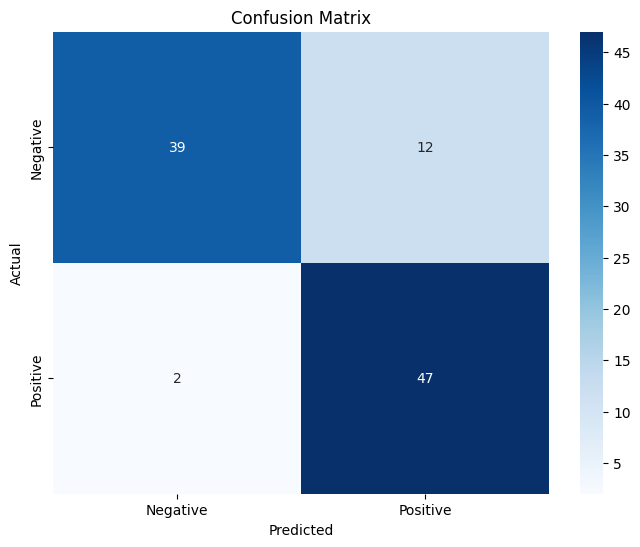

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,logistic_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MANUAL TESTING for WITH PACKAGE IMPLEMENTATION

In [20]:
def logistic_prediction_testing():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    print(X)
    
    # Make the prediction
    prediction = logistic_model.predict(X)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
logistic_prediction_testing()

[[0. 0. 0. ... 0. 0. 0.]]
The news is Real  [0]


WITHOUT PYTHON PACKAGE IMPLEMENTATION

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class logistic_regression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        # Convert probabilities to binary predictions
        binary_predictions = (y_pred >= 0.5).astype(int)
        return binary_predictions

EVALUATION
1) Accuracy Score

In [23]:
log_r = logistic_regression(lr=0.01)
log_r.fit(X1_train,y1_train)

# accuracy score on the training data
X1_train_prediction = log_r.predict(X1_train)
training_data_accuracy1 = accuracy_score(X1_train_prediction, y1_train)
print('Accuracy score of the training data : ', training_data_accuracy1)

# accuracy score on the test data
X1_test_prediction = log_r.predict(X1_test)
test_data_accuracy1 = accuracy_score(X1_test_prediction, y1_test)
print('Accuracy score of the test data : ', test_data_accuracy1)

Accuracy score of the training data :  0.945
Accuracy score of the test data :  0.76


2) Classification Report

In [24]:
logistic_pred = log_r.predict(X1_test)
print(classification_report(y1_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72        54
           1       0.66      0.98      0.79        46

    accuracy                           0.76       100
   macro avg       0.82      0.78      0.76       100
weighted avg       0.83      0.76      0.75       100



3) Confusion Matrix

Confusion Matrix:
 [[31 23]
 [ 1 45]]


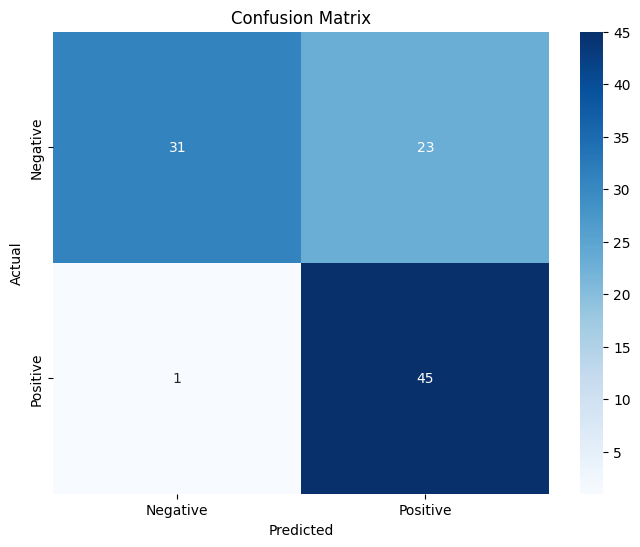

In [25]:
cm = confusion_matrix(y1_test,logistic_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MANUAL TESTING for WITHOUT PACKAGE IMPLEMENTATION

In [26]:
def manual_logistic_prediction():
    # Taking input of any news in form of text
    X = input("ENTER A NEWS FOR PREDICTION: ")
    # Apply stemming to the input text
    X_new = stemming(X)

    # Vectorize the stemmed textvectorizer.fit(X)
    X = vectorizer.transform([X_new])
    X = X.toarray()
    print(X)
    
    # Make the prediction
    prediction = log_r.predict(X)
    if (prediction==0):
     print('The news is Real ',prediction)
    else:
     print('The news is Fake',prediction)

# Example usage
manual_logistic_prediction()

[[0. 0. 0. ... 0. 0. 0.]]
The news is Real  [0]
